In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import math
import random as randn
import datetime
from pandas import Series, DataFrame
%matplotlib inline

In [52]:
# Oil Production and Performance Data

In [19]:
df = pd.read_csv('/Users/Priya/Desktop/Capstone Project SB/Data_Capstone Project.csv')

In [21]:
df.head(10)

,DATE,ASSET,UWI,FACILITYID,FACILITYNAME,FACILITYTYPE,FIELDCODE,FIELDNAME,FIELDRESCODE,RESERVOIRCODE,...,WELLTYPE,X,Y,BOTTOMDEPTH,TOPDEPTH,LENGTH,INNERDIAMETER,OUTERDIAMETER,CURRENTSTATUS,WELLCOMPLETIONS
0,12/1/55,Avengers,IM-0001,1,C,CASING,IM,IronMan,IMZU,MZSD,...,Oil Well,764038.29,3309483.4,10006.0,9940.0,66.0,6.094,7.0,CLOSED,863725
1,12/1/55,Avengers,IM-0001,1,T,TUBING,IM,IronMan,IMZU,UZSD,...,Oil Well,764038.29,3309483.4,9447.0,9238.0,209.0,6.184,7.0,CLOSED,867459
2,1/1/56,Avengers,IM-0001,1,T,TUBING,IM,IronMan,IMZU,UZSD,...,Oil Well,764038.29,3309483.4,9447.0,9238.0,209.0,6.184,7.0,CLOSED,867459
3,1/1/56,Avengers,IM-0001,1,C,CASING,IM,IronMan,IMZU,MZSD,...,Oil Well,764038.29,3309483.4,10006.0,9940.0,66.0,6.094,7.0,CLOSED,863725
4,2/1/56,Avengers,IM-0001,1,C,CASING,IM,IronMan,IMZU,MZSD,...,Oil Well,764038.29,3309483.4,10006.0,9940.0,66.0,6.094,7.0,CLOSED,863725
5,2/1/56,Avengers,IM-0001,1,T,TUBING,IM,IronMan,IMZU,UZSD,...,Oil Well,764038.29,3309483.4,9447.0,9238.0,209.0,6.184,7.0,CLOSED,867459
6,3/1/56,Avengers,IM-0001,1,C,CASING,IM,IronMan,IMZU,MZSD,...,Oil Well,764038.29,3309483.4,10006.0,9940.0,66.0,6.094,7.0,CLOSED,863725
7,3/1/56,Avengers,IM-0001,1,T,TUBING,IM,IronMan,IMZU,UZSD,...,Oil Well,764038.29,3309483.4,9447.0,9238.0,209.0,6.184,7.0,CLOSED,867459
8,4/1/56,Avengers,IM-0001,1,C,CASING,IM,IronMan,IMZU,MZSD,...,Oil Well,764038.29,3309483.4,10006.0,9940.0,66.0,6.094,7.0,CLOSED,863725
9,4/1/56,Avengers,IM-0001,1,T,TUBING,IM,IronMan,IMZU,UZSD,...,Oil Well,764038.29,3309483.4,9447.0,9238.0,209.0,6.184,7.0,CLOSED,867459


In [9]:
df.describe()

,FACILITYID,CALENDARDAYS,OPERATIONALDAYS,WATERCUT,OILVOLUME,OILRATEOD,OILRATECD,WATERVOLUME,WATERRATEOD,WATERRATECD,...,GASRATECD,GOR,X,Y,BOTTOMDEPTH,TOPDEPTH,LENGTH,INNERDIAMETER,OUTERDIAMETER,WELLCOMPLETIONS
count,167431.000000,167431.000000,167386.000000,166903.000000,148356.000000,167386.000000,167431.000000,162239.000000,166860.000000,166861.000000,...,167127.000000,167304.000000,167431.000000,1.674310e+05,91982.000000,91982.000000,87305.000000,84997.000000,84997.000000,167431.000000
mean,1.685273,30.446608,22.839392,0.171124,31779.605782,1778.702095,1489.928755,8098.065697,299.813051,271.650122,...,1101.090474,625.492288,766700.814937,3.308328e+06,8474.379652,8272.494771,119.364401,6.527573,7.291985,582346.273498
std,1.182450,0.803290,11.616548,0.249442,35422.457596,3756.322908,2316.478080,15080.133741,560.546239,508.229569,...,2046.459115,2628.399526,9323.434707,8.665174e+03,940.056064,1306.024307,94.239349,1.245037,1.324114,296963.481566
min,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,733986.801000,3.275027e+06,690.000000,0.000000,4.000000,1.995000,2.375000,10051.000000
25%,1.000000,30.000000,17.000000,0.000000,6936.987858,382.785000,288.295000,0.000000,0.000000,0.000000,...,102.480000,267.000000,762591.040000,3.303603e+06,7920.000000,7820.000000,51.000000,6.276000,7.000000,273701.000000
50%,1.000000,31.000000,30.000000,0.001000,21726.822555,969.035000,833.650000,10.292497,1.270000,1.050000,...,449.250000,544.800000,765457.990000,3.307802e+06,8204.000000,8127.000000,96.000000,6.276000,7.000000,863754.000000
75%,2.000000,31.000000,31.000000,0.329000,45324.350000,2104.367500,1842.275000,10576.379575,412.585000,356.430000,...,1267.640000,768.322500,774596.000000,3.310482e+06,8442.000000,8319.000000,159.000000,6.276000,7.000000,865441.000000
max,12.000000,31.000000,32.458300,1.000000,677957.772400,984274.070000,30551.890000,207692.650200,33029.940000,22680.000000,...,61344.940000,640162.470000,785786.542000,3.332471e+06,12100.000000,12062.000000,570.000000,9.950000,10.750000,868177.000000


In [14]:
calendar_days = df[('CALENDARDAYS')]

In [16]:
calendar_days.head()

0    31
1    31
2    31
3    31
4    29
Name: CALENDARDAYS, dtype: int64

In [18]:
meancd = np.mean(calendar_days)

In [25]:
meancd

30.446607856370683

In [26]:
operational_days = df[('OPERATIONALDAYS')]

In [31]:
operational_days.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: OPERATIONALDAYS, dtype: float64

In [32]:
meanod = np.mean(operational_days)

In [33]:
meanod

22.839391529239304

In [54]:
ov_dt = df[['OILVOLUME', 'DATE']]

In [56]:
ov_dt.head(10)

,OILVOLUME,DATE
0,15439.5233,12/1/55
1,5197.8438,12/1/55
2,0.0000,1/1/56
3,0.0000,1/1/56
4,0.0000,2/1/56
5,0.0000,2/1/56
6,0.0000,3/1/56
7,0.0000,3/1/56
8,0.0000,4/1/56
9,0.0000,4/1/56


In [27]:
ov = df[('OILVOLUME')]
ov.head()

0    15439.5233
1     5197.8438
2        0.0000
3        0.0000
4        0.0000
Name: OILVOLUME, dtype: float64

In [30]:
wt = df[('WELLTYPE')]

In [31]:
wt.head()

0    Oil Well
1    Oil Well
2    Oil Well
3    Oil Well
4    Oil Well
Name: WELLTYPE, dtype: object

In [25]:
dt = df[('DATE')]
dt.head()

0    12/1/55
1    12/1/55
2     1/1/56
3     1/1/56
4     2/1/56
Name: DATE, dtype: object

In [44]:
df['DATE'].head()

0    12/1/55
1    12/1/55
2     1/1/56
3     1/1/56
4     2/1/56
Name: DATE, dtype: object

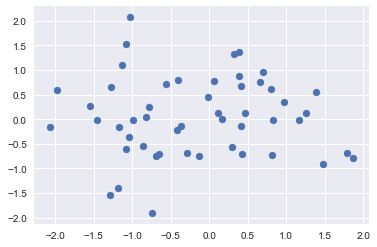

In [16]:
df = pd.DataFrame(np.random.randn(50,4), columns = list("ABCD"))

plt.scatter(df['A'],df['B']) 
plt.show()

In [114]:
df = pd.DataFrame(np.random.randn(50,4), columns = list[('DATE'), ('OILVOLUME'))

plt.scatter(df['DATE'], df['OILVOLUME']) 
plt.show()

SyntaxError: invalid syntax (<ipython-input-114-640a0cf9c046>, line 1)

In [116]:
dates = pd.date_range('1955/12/01', '20170101')
dates 

DatetimeIndex(['1955-12-01', '1955-12-02', '1955-12-03', '1955-12-04',
               '1955-12-05', '1955-12-06', '1955-12-07', '1955-12-08',
               '1955-12-09', '1955-12-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', length=22313, freq='D')

In [36]:
dates.shape

(733,)

In [117]:
ov = Series(ov, index=dates)

In [118]:
ov.head()

1955-12-01   NaN
1955-12-02   NaN
1955-12-03   NaN
1955-12-04   NaN
1955-12-05   NaN
Freq: D, Name: OILVOLUME, dtype: float64

ValueError: x and y must be the same size

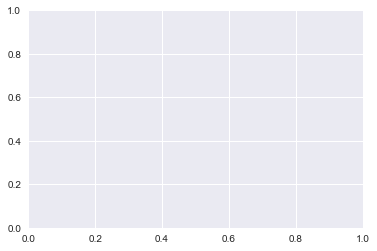

In [59]:
plt.scatter(dt, ov)
plt.show()

In [99]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("12/01/1955", periods = 1000)

ts = ts.cumsum()

ts.plot()

SyntaxError: invalid syntax (<ipython-input-99-0896ede9411a>, line 3)

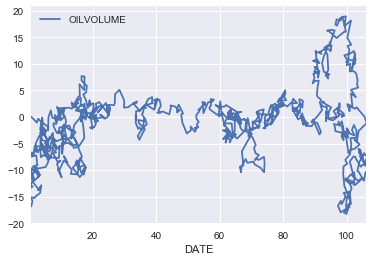

In [92]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['DATE', 'OILVOLUME']).cumsum()
dates = pd.date_range('1955-12-01','2017-01-01', freq ='M')

df3['DATE'] = pd.Series(list(range(len(df))))

df3.plot(x='DATE', y='OILVOLUME')

In [101]:
rng = pd.date_range(start, end, freq='BM')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts.index

NameError: name 'start' is not defined

In [106]:
dt.time = pd.to_datetime(dt['DATE'])
dt.set_index(['DATE'],inplace=True)
dt.plot()

KeyError: 'DATE'

/Users/Priya/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


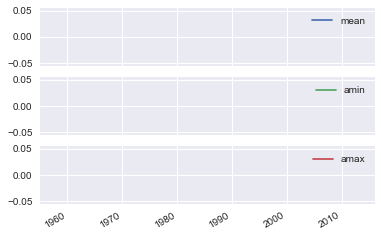

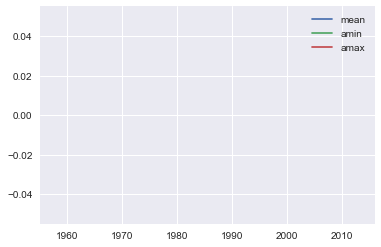

In [111]:
ov_mm = ov.resample("A", how=['mean', np.min, np.max])
ov_mm['1955':'2017'].plot(subplots=True)
ov_mm['1955':'2017'].plot()